# About the Data

This notebook covers the exploration of data used in this project. Prior to putting this together, the following project files were run to generate the data:

* 1extract_candidate_tweets.py (*requires Twitter api key*)
* 1extract_noncandidate_tweets.py (*requires Twitter api key*)
* 2transform_tweets.py



In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# tweets data set
fname_tweets = 'data/data.csv'
tweets = pd.read_csv(fname_tweets)
# people data set
fname_people = 'data/People.xlsx' 
people = pd.read_excel(fname_people)
people = people.loc[people['Handle'].isin(tweets['handle'])]

On May 24th, over 300,000 tweets respective to approximately 110 Twitter handles were extracted using the Tweepy library API. These were handles of pre-identified presidential candidates and sampling of non-candidates, mostly consisting of well-known political figures. This data was collected manually from publically available online sources such as https://ballotpedia.org. Other sources are cited in the project references.

In [6]:
people.head()

,Key,Name,Party,State,Governor,Senate,House,Ran 2020,2020 Join,2020 Drop,Ran 2016,2016 Join,2016 Drop,positions held,Handle,Looked for handle?
1,Abby Finkenauer-Iowa,Abby Finkenauer,Democratic,Iowa,0,0,1,0,NaT,NaT,0,NaT,NaT,1,RepFinkenauer,1.0
11,Al Green-Texas,Al Green,Democratic,Texas,0,0,1,0,NaT,NaT,0,NaT,NaT,1,RepAlGreen,1.0
37,Amy Klobuchar-Minnesota,Amy Klobuchar,Democratic,Minnesota,0,1,0,1,2019-02-10,2020-03-02,0,NaT,NaT,1,amyklobuchar,1.0
43,Andrew Yang-New York,Andrew Yang,Democratic,New York,0,0,0,1,2017-11-06,2020-02-11,0,NaT,NaT,0,AndrewYang,1.0
95,Ben Carson-Maryland,Ben Carson,Republican,Maryland,0,0,0,0,NaT,NaT,1,2015-05-03,2016-03-04,0,RealBenCarson,1.0


This data was used to determine which candidates announced their candidacy to run for President of the United States, the date of the announcement, and other attributes. Each observation represent dimensional data specific to a person; data includes both **candidates** and **non-candidates**. Among these attributes are included their political affiliations as shown in proportions below.

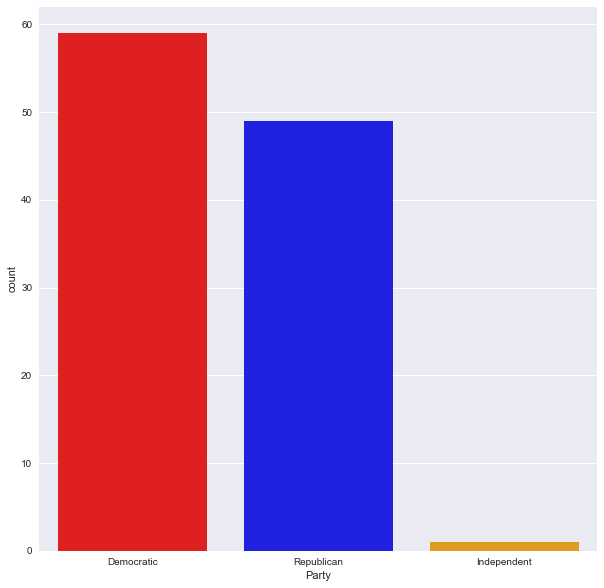

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize': (10,10)})
sns.countplot(x='Party', data=people, palette=['red','blue','orange'])

In addition to their party affiliation, other information includes the states in which they were primarily active.

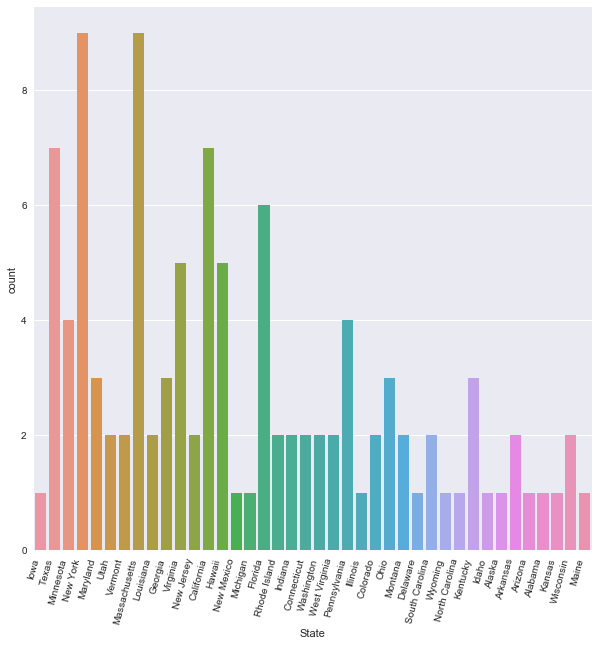

In [17]:
plot1 = sns.countplot(x='State', data=people)
plot1 = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=75, horizontalalignment='right')

The following table shows an aggregation of key attributes by political party.

In [18]:
people.groupby('Party').sum()

,Governor,Senate,House,Ran 2020,Ran 2016,positions held,Looked for handle?
Party,,,,,,,
Democratic,12,17,29,28,5,58,59.0
Independent,0,1,1,1,1,2,1.0
Republican,18,14,27,5,17,59,49.0


The following plot compares party affiliation to their primary government role (i.e. governer, senate, house).

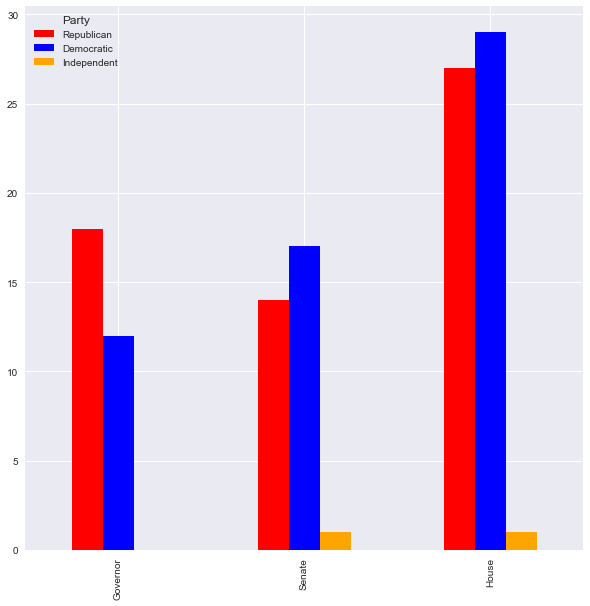

In [29]:
df_party = people.groupby('Party').sum()
df_party.reset_index(inplace=True)
subset = ['Party', 'Governor', 'Senate', 'House']
df_party = df_party[subset]
df_party = df_party.assign(tmp=df_party.sum(axis=1)).sort_values('tmp', ascending=False).drop('tmp',1)
#sns.set()
df_party.set_index('Party').T.plot(kind='bar', stacked=False, color = ['red','blue','orange'])

## Exploring Tweets Collected
The original tweets collected were formatted as JSON, filtered for english language, and subset to include just the text and creation dates.

In [47]:
from datetime import datetime
import time
import re
import numpy as np

def get_date(created_at):
    """Function to convert Twitter created_at to date format
    Argument:
        created_at {[str]} -- [raw tweet creation date time stamp]
    Returns:
        [str] -- [date e.g. '2020-04-18']
    """
    return time.strftime('%Y-%m-%d', time.strptime(created_at, '%a %b %d %H:%M:%S +0000 %Y'))

def get_date_time(tweetdate):
    """Function to convert twitter date to date time object
    
    Arguments:
        tweetdate {[str]} -- [twitter created at date]
    
    Returns:
        [datetime.datetime] -- [date time object]
    """
    
    dt = datetime.strptime(tweetdate, '%Y-%m-%d %H:%M:%S')
    return dt
# 2020-05-25 01:17:08

def clean_tweet(tweet):
    """Utility function to clean tweet text by removing links
    , hashtags, @mentions, and numbers
        using simple regex statements. Converts text to lowercase
    
    Arguments:
        tweet {[str]} -- [tweet text]
    
    Returns:
        [str] -- [clean tweet text]
    """    
    # remove links, hashtags, mentions, convert to lowercase
    pattern = re.compile("(\\w+:\\/\\/\\S+)|(#[A-Za-z0-9]+)|(@[A-Za-z]+[A-Za-z0-9-_]+)")
    tweet = re.sub(pattern, ' ', tweet).lower() 
    # remove numbers
    words = tweet.split()
    reformed = [word for word in words if not re.match('\\d', word)]
    tweet = ' '.join(reformed)
    out = ' '.join(tweet.split())
    return out    

In [34]:
print("There are {:d} tweets collected from {:d} Twitter handles".format(tweets.shape[0], len(tweets['handle'].unique())))

There are 308423 tweets collected from 109 Twitter handles


Altogether the tweets were created over a period of several years. The following shows this distribution.

In [45]:
dates = tweets['created_at'].apply(get_date_time)

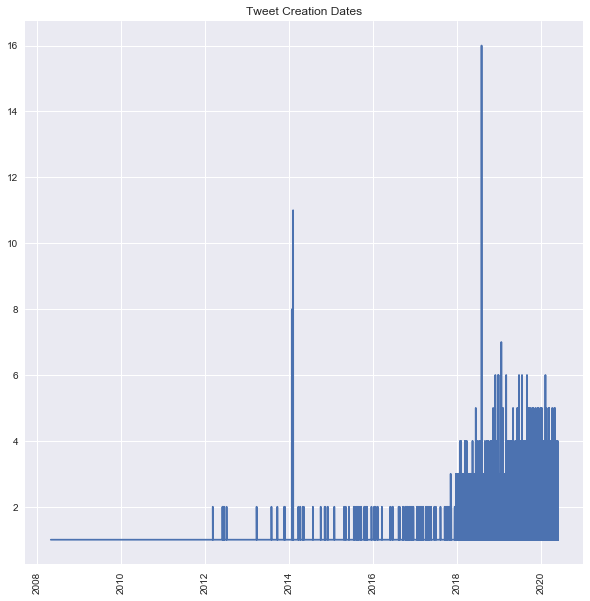

In [48]:
X,Y = np.unique(dates, return_counts=True)
plt.plot(X, Y)
plt.xticks(rotation=90)
plt.title("Tweet Creation Dates")
#plt.savefig('plt_tweet_time.png', bbox_inches = 'tight')
plt.show()

## Plot of Top 10 Candidates by Number of Tweets

Text(0.5, 1.0, 'Top 10 2020 Candidates by Tweet Count')

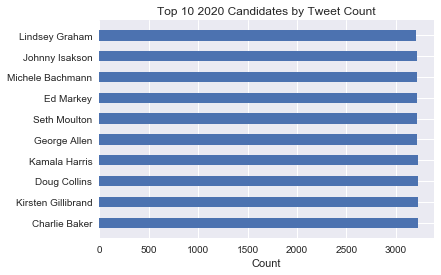

In [53]:
from collections import Counter
%matplotlib inline
users = tweets['user_name'].values
counter = Counter(users)
top10users = counter.most_common(10)
labels, values = zip(*top10users)
indexes = np.arange(len(labels))
width = 0.5 
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.xlabel('Count')
plt.title("Top 10 Persons by Tweet Count")
#plt.savefig('plt_top_users.png', bbox_inches = 'tight')

## 2020 Candidates Tweet Counts

In [76]:
def plot_candidate_tweets(df):
    # get party respective to twitter handle; and colors
    partydict = {}
    for idx, row in df.iterrows():
        partydict[row['Handle']] = row['Party']
    handlelist = tweets.loc[tweets['handle'].isin(df['Handle']), 'handle'].tolist()
    counter = Counter(handlelist)
    labels, values = zip(*counter.items())
    colorlist = []
    for label in labels:
        if partydict[label] == 'Republican':
            val = 'red'
        elif partydict[label] == 'Democratic':
            val = 'blue'
        else: 
            val = 'orange'
        colorlist.append(val)
    # number of tweets by user
    indexes = np.arange(len(labels))
    plt.bar(indexes, values, color = colorlist)
    plt.xticks(indexes + width * 0.5, labels)
    plt.xticks(rotation=90)
    plt.title("Candidate Tweet Counts")

## 2016 Candidates Tweet Counts

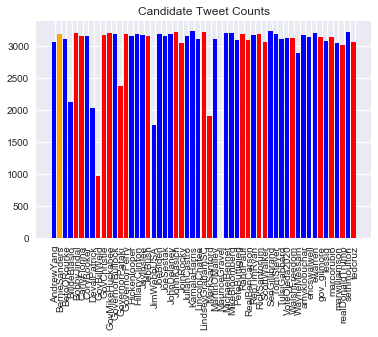

In [85]:
df = people[(people['Ran 2020'] == 1) | (people['Ran 2016'] == 1)]
plot_candidate_tweets(df)

## Non-Candidate Tweet Counts

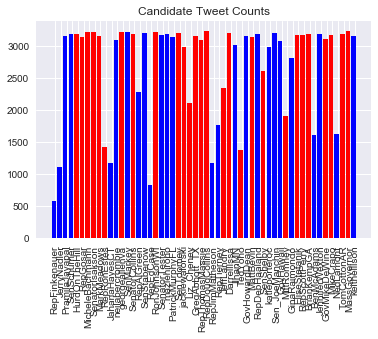

In [80]:
df = people[(people['Ran 2016'] == 0) & (people['Ran 2020'] == 0)]
plot_candidate_tweets(df)

## Examine Tweet Text
Tweet text with the following transformations applied:
* stopwords removed
* removed links, hashtags, mentions, and converted to lowercase
* alphabetic words only

In [98]:
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def corpus_stats(documents):
    """Function to print tweet-level and corpus-level statistics
    These include
    - Average number of characters per tweet
    - Average number of words per tweet
    - Average vocabulary size per tweet
    - Average lexical richness per tweet
    - Total number of words
    - Total vocabulary size
    - Total lexical richness
    - Average number of characters per word
    
    Arguments:
        documents {[list]} -- [list of strings i.e. tweets]
    """
    docs = [word_tokenize(tweet) for tweet in documents]    
    # tweet statistics
    print("observation level statistics:\n")
    # average number of characters per tweet
    avg_chars = int(sum([len(tweet) for tweet in documents]) / len(documents))
    print("Average number of characters per tweet: {:d}".format(avg_chars))
    # average number of words per tweet
    avg_words = int(sum([len(doc) for doc in docs]) / len(docs))
    print("Average number of words per tweet: {:d}".format(avg_words))
    # average vocabulary size per tweet
    avg_vocab = int(sum([len(set(doc)) for doc in docs]) / len(docs))
    print("Average vocabulary size per tweet: {:d}".format(avg_vocab))
    # average lexical richness per tweet (proportion of unique words to total words)
    avg_lex_rich = sum([len(set(doc))/len(doc) for doc in docs if len(doc) > 0]) / len(docs)
    print("Average lexical richness per tweet: {:.2f}".format(avg_lex_rich))
    # corpus statistics
    print("\nCorpus level statistics:\n")
    words = []
    for doc in docs:
        words.extend(doc)
    # total number of words
    print("Total number of words: {:d}".format(len(words)))
    # vocabulary size
    print("Total vocabulary size: {:d}".format(len(set(words))))
    # lexical richness
    print("Total lexical richness: {:.2f}".format(len(set(words)) / len(words)))
    # average number of characters per word
    word_lengths = [len(w) for w in words]
    print("Average number of characters per word: {:.2f}".format(sum(word_lengths) / len(word_lengths))) 

def term_freq(documents):
    """Function to plot top 30 common terms    
    
    Arguments:
        documents {[list]} -- [list of strings i.e. tweets]
    """
    docs = [word_tokenize(tweet) for tweet in documents]        
    words = []
    for doc in docs:
        words.extend(doc)
    filtered_words = [w for w in words if w.isalpha() if not w in stop_words]
    fdist = FreqDist(filtered_words)   
    fdist.plot(30, title = 'Top 30 Most Common Words')

In [101]:
candidate_tweets = tweets.loc[tweets[['candidate_2020', 'candidate_2016']].sum(axis = 1) == 1, 'text'].apply(clean_tweet).tolist()
noncandidate_tweets = tweets.loc[tweets[['candidate_2020', 'candidate_2016']].sum(axis = 1) == 0, 'text'].apply(clean_tweet).tolist()

## Candidate Tweets: Corpus Statistics

In [102]:
corpus_stats(candidate_tweets)

observation level statistics:

Average number of characters per tweet: 92
Average number of words per tweet: 19
Average vocabulary size per tweet: 17
Average lexical richness per tweet: 0.93

Corpus level statistics:

Total number of words: 2995081
Total vocabulary size: 64803
Total lexical richness: 0.02
Average number of characters per word: 4.02


## Non-Candidate Tweets: Corpus Statistics

In [103]:
corpus_stats(noncandidate_tweets)

observation level statistics:

Average number of characters per tweet: 94
Average number of words per tweet: 18
Average vocabulary size per tweet: 17
Average lexical richness per tweet: 0.94

Corpus level statistics:

Total number of words: 2768990
Total vocabulary size: 66551
Total lexical richness: 0.02
Average number of characters per word: 4.17


## Candidate Tweets: Term Frequency

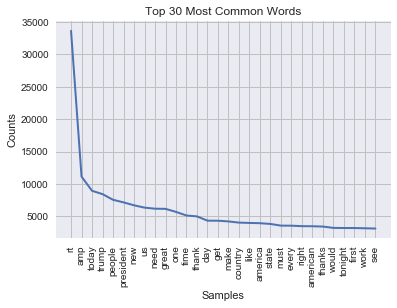

In [104]:
term_freq(candidate_tweets)

## Non-Candidate Tweets: Term Frequency

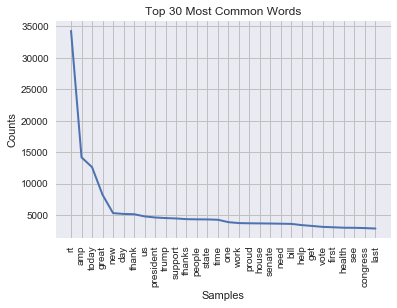

In [105]:
term_freq(noncandidate_tweets)

## Candidate Tweets: Sentiment

Text(0.5, 1.0, 'Boxplot of Polarity')

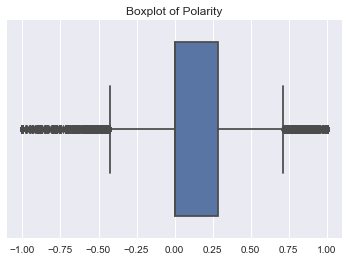

In [121]:
from textblob import TextBlob
scorelist = [TextBlob(tweet).sentiment.polarity for tweet in candidate_tweets]
fig, ax = plt.subplots()
sns.boxplot(scorelist, ax=ax).set_title("Boxplot of Polarity")

In [132]:
def get_sentiment(score):
    """Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
    
    Arguments:
        scores {[float]} -- [Textblob score]
    
    Returns:
        [str] -- [sentiment label]
    """    
    # sentiment labels
    if score > 0:
        return 'pos'
    elif score == 0:
        return 'neu'
    else:
        return 'neg'
def plot_sentiment(scorelist):
    """Barplot of sentiment labels
    
    Arguments:
        scorelist {[list]} -- [list of Textblob scores]        
    """
    sentlist = [get_sentiment(score) for score in scorelist]
    counter = Counter(sentlist)
    labels = counter.keys()
    values = [v / sum(counter.values()) for v in counter.values()]
    indexes = np.arange(len(labels))
    width = 0.5
    plt.barh(indexes, values, width)
    plt.yticks(indexes, labels)
    plt.xlabel('Count')
    plt.title("Sentiment Frequency")

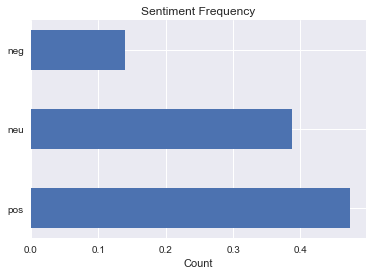

In [133]:
plot_sentiment(scorelist)

## Non-Candidate Tweets: Sentiment

Text(0.5, 1.0, 'Boxplot of Polarity')

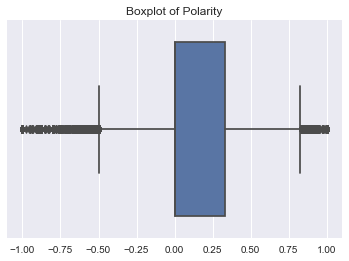

In [134]:
scorelist = [TextBlob(tweet).sentiment.polarity for tweet in noncandidate_tweets]
fig, ax = plt.subplots()
sns.boxplot(scorelist, ax=ax).set_title("Boxplot of Polarity")

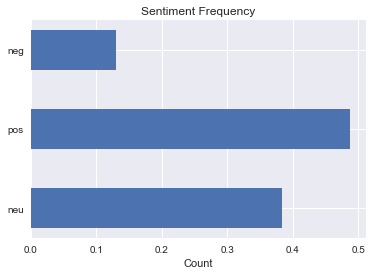

In [135]:
plot_sentiment(scorelist)

## Candidate Tweets: Part-of-Speech

In [117]:
from nltk import pos_tag

def get_pos_frequency(documents, title):
    """Function to plot POS frequency
    
    Arguments:
        documents {[list]} -- [list of strings i.e. tweets]
    """    
    wordlist = []
    for document in documents:
        wordlist.extend(word_tokenize(document))
    tagged_words = pos_tag(wordlist)
    numNoun,numVerb,numAdj,numAdv = 0,0,0,0
    for (word, tag) in tagged_words:
        if tag.startswith('N'): numNoun += 1     
        if tag.startswith('V'): numVerb += 1
        if tag.startswith('J'): numAdj += 1
        if tag.startswith('R'): numAdv += 1
    total = sum([numNoun, numVerb, numAdj, numAdv])
    height = [numNoun/total, numVerb/total, numAdj/total, numAdv/total]
    bars = ('Nouns','Verbs','Adjectives','Adverbs')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.title(title)
    plt.show()

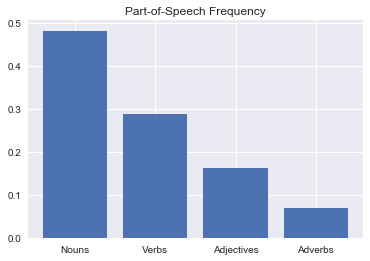

In [119]:
get_pos_frequency(candidate_tweets, "Part-of-Speech Frequency")

## Non-Candidate Tweets: Part-of-Speech

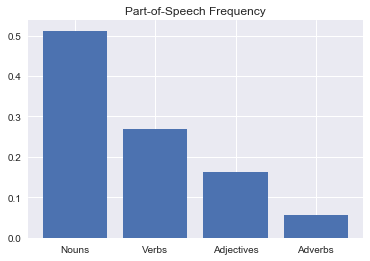

In [120]:
get_pos_frequency(noncandidate_tweets, "Part-of-Speech Frequency")

## Candidate Tweets: Word Cloud

In [ ]:
from wordcloud import WordCloud 

def get_wc(documents):
    """Function to plot word cloud
    
    Arguments:
        documents {[list]} -- [list of strings i.e. tweets]
    """ 
    text = ' '.join(word_tokenize(document) for document in documents)
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure(figsize=())